In [30]:
%load_ext autoreload
%autoreload 2
from mceq2d_dists import MCEQDist2D, CalcMCEqHists, MCEq2Histogram
import matplotlib.pylab as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
mceq_sol = MCEQDist2D(
                 energy = 100,
                 pdg_id = 2212,
                 theta_deg = 30,
                 slant_depths = [143, 647, 1033],
                 energy_range = [1e-1, 1e4],
                 interaction_model = "EPOS-LHC", 
                 hybrid_crossover = 0.1,
                 density_model = ("CORSIKA", ("USStd", None)))

MCEqRun::set_interaction_model(): EPOSLHC
MCEqRun::set_density_model(): Setting density profile to CORSIKA ('USStd', None)
MCEqRun::set_primary_model(): Primary model set to Hillas-Gaisser (H3a)


100%|██████████| 2559/2559 [00:19<00:00, 132.08it/s]


In [39]:
mceq_dists = CalcMCEqHists(mceq_sol, particles = [12, 13, 14])

  0%|          | 0/3 [00:00<?, ?it/s]

Inverse hankel transform for (-12, 0) and depths [143, 300]


Inverse hankel transform for (12, 0) and depths [143, 300]


 33%|███▎      | 1/3 [00:10<00:20, 10.19s/it]

Inverse hankel transform for (-13, 0) and depths [143, 300]


Inverse hankel transform for (-13, -1) and depths [143, 300]


Inverse hankel transform for (-13, 1) and depths [143, 300]


Inverse hankel transform for (13, 0) and depths [143, 300]


Inverse hankel transform for (13, -1) and depths [143, 300]


Inverse hankel transform for (13, 1) and depths [143, 300]


 67%|██████▋   | 2/3 [00:40<00:21, 21.92s/it]

Inverse hankel transform for (-14, 0) and depths [143, 300]


Inverse hankel transform for (14, 0) and depths [143, 300]


100%|██████████| 3/3 [00:50<00:00, 16.84s/it]


In [40]:
angle_bins = mceq_dists.default_angbins
energy_bins = mceq_dists.default_ebins #[1, 1.3, 2, 2.5, 4, 5]
mceq_hists = mceq_dists.histograms(energy_bins, angle_bins)

  0%|          | 0/3 [00:00<?, ?it/s]

Particle 12, slant depth = 143
Particle 12, slant depth = 300


 33%|███▎      | 1/3 [00:53<01:46, 53.04s/it]

Particle 13, slant depth = 143
Particle 13, slant depth = 300


 67%|██████▋   | 2/3 [01:39<00:49, 49.33s/it]

Particle 14, slant depth = 143
Particle 14, slant depth = 300


100%|██████████| 3/3 [02:33<00:00, 51.33s/it]


In [43]:
angle_bins = mceq_dists.default_angbins
energy_bins = [1, 1.3, 2, 2.5, 4, 5]
mceq_hist1 = mceq_dists.histograms(energy_bins, angle_bins)

  0%|          | 0/3 [00:00<?, ?it/s]

Particle 12, slant depth = 143
Particle 12, slant depth = 300


 33%|███▎      | 1/3 [00:04<00:08,  4.26s/it]

Particle 13, slant depth = 143
Particle 13, slant depth = 300


 67%|██████▋   | 2/3 [00:07<00:03,  3.75s/it]

Particle 14, slant depth = 143
Particle 14, slant depth = 300


100%|██████████| 3/3 [00:11<00:00,  3.95s/it]


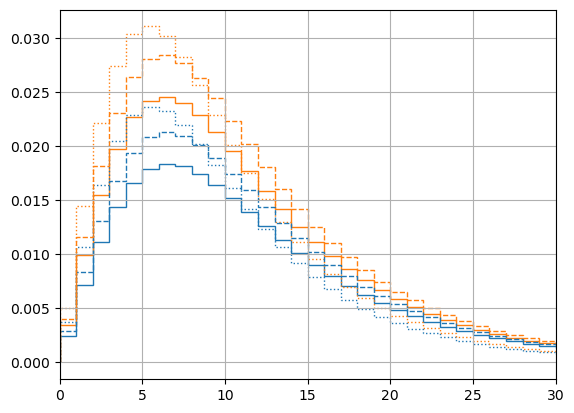

In [57]:

pdg = 13
line1 = plt.stairs(mceq_hists[pdg][143]["hist_en_ang"][11], 
           np.rad2deg(mceq_hists[pdg][143]["ang_bins"]))
line2 = plt.stairs(mceq_hists[pdg][300]["hist_en_ang"][11], 
           np.rad2deg(mceq_hists[pdg][300]["ang_bins"]))

plt.stairs(mceq_hists[pdg][143]["hist_en_ang"][12], 
           np.rad2deg(mceq_hists[pdg][143]["ang_bins"]),
           linestyle = ":",
           color = line1.get_edgecolor())
plt.stairs(mceq_hists[pdg][300]["hist_en_ang"][12], 
           np.rad2deg(mceq_hists[pdg][300]["ang_bins"]),
           linestyle = ":",
           color = line2.get_edgecolor())


plt.stairs(mceq_hist1[pdg][143]["hist_en_ang"][0], 
           np.rad2deg(mceq_hist1[pdg][143]["ang_bins"]),
           linestyle = "--",
           color = line1.get_edgecolor())
plt.stairs(mceq_hist1[pdg][300]["hist_en_ang"][0], 
           np.rad2deg(mceq_hist1[pdg][300]["ang_bins"]),
           linestyle = "--",
           color = line2.get_edgecolor())
# plt.stairs(mceq_hists[13]["hist_en_ang"][14], np.rad2deg(mceq_hists[13]["ang_bins"]))
# plt.stairs(mceq_hists[13]["hist_en_ang"][17], np.rad2deg(mceq_hists[13]["ang_bins"]))


# plt.stairs(dist_hist[12][2][0], np.rad2deg(dist_hist[12][1]))
# plt.stairs(dist_hist[12][2][2], np.rad2deg(dist_hist[12][1]))
# plt.stairs(dist_hist[12][2][4], np.rad2deg(dist_hist[12][1]))

# plt.stairs(dist_hist[14][2][0], np.rad2deg(dist_hist[14][1]))
# plt.stairs(dist_hist[14][2][2], np.rad2deg(dist_hist[14][1]))
# plt.stairs(dist_hist[14][2][4], np.rad2deg(dist_hist[14][1]))
# plt.stairs(hist_sol[14], np.rad2deg(ang_bins))
# plt.stairs(hist_sol[17], np.rad2deg(ang_bins))


plt.xlim(0, 30)
# plt.yticks(np.linspace(0, 1.5e-2, 4))
# plt.ylim(0.99, 1.008)
plt.grid()

In [1]:
mceq_sol = MCEQDist2D(
                 energy = 100,
                 pdg_id = 2212,
                 theta_deg = 30,
                 slant_depth = [143, 647, 1033],
                 energy_range = [1e-1, 1e4],
                 interaction_model = "EPOS-LHC", 
                 hybrid_crossover = 0.1,
                 density_model = ("CORSIKA", ("USStd", None)))

NameError: name 'MCEQDist2D' is not defined